/homes/mcolombari/.local/lib/python3.9/site-packages/torch/__config__.py:9: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 11040). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._show_config()


[(0, 1), (1, 2), (4, 2), (2, 3), (5, 3), (7, 3), (8, 3), (6, 4), (11, 4), (12, 4), (13, 33), (3, 42), (9, 45), (10, 666)]
[0, 1, 0, 4, 0, 2, 0, 5, 0, 7, 0, 8, 1, 4, 1, 2, 1, 5, 1, 7, 1, 8, 1, 6, 1, 11, 1, 12, 4, 2, 4, 5, 4, 7, 4, 8, 4, 6, 4, 11, 4, 12, 2, 5, 2, 7, 2, 8, 2, 6, 2, 11, 2, 12, 5, 7, 5, 8, 5, 6, 5, 11, 5, 12, 7, 8, 7, 6, 7, 11, 7, 12, 8, 6, 8, 11, 8, 12, 6, 11, 6, 12, 11, 12]
[1, 0, 4, 0, 2, 0, 5, 0, 7, 0, 8, 0, 4, 1, 2, 1, 5, 1, 7, 1, 8, 1, 6, 1, 11, 1, 12, 1, 2, 4, 5, 4, 7, 4, 8, 4, 6, 4, 11, 4, 12, 4, 5, 2, 7, 2, 8, 2, 6, 2, 11, 2, 12, 2, 7, 5, 8, 5, 6, 5, 11, 5, 12, 5, 8, 7, 6, 7, 11, 7, 12, 7, 6, 8, 11, 8, 12, 8, 11, 6, 12, 6, 12, 11]
84
14


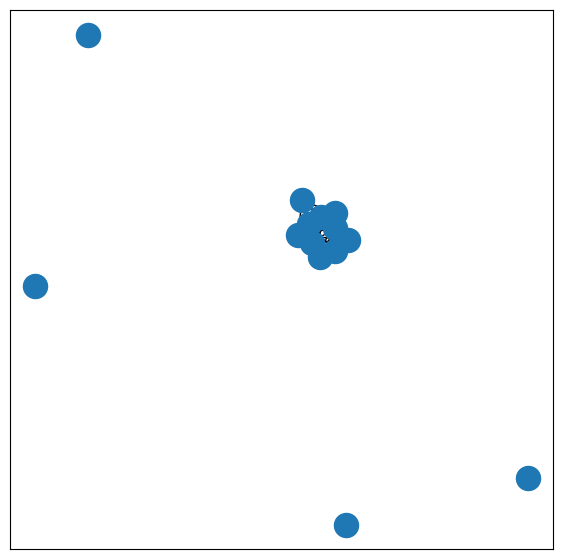

In [1]:
import torch
from torch_geometric.data import Data
from torch_geometric.utils import to_networkx
import networkx as nx
from matplotlib import pyplot as plt

# list_list[[], []]
in_list = [1,2,3,42,2,3,4,3,3,45,666,4,4,33]
t = 5
x = list(zip(range(len(in_list)), in_list))

x = sorted(x, key=lambda x: x[1])
combinations = [[],[]]
print(x)

for i in range(len(x)):
    for j in range(i+1, len(x)):
        if(x[j][1] < x[i][1] + 3):
            combinations[0].append(x[i][0])
            combinations[0].append(x[j][0])
            combinations[1].append(x[j][0])
            combinations[1].append(x[i][0])
        else:
            break
print(combinations[0])
print(combinations[1])

print(len(combinations[1]))
print(len(x))

edge_index = torch.tensor(combinations, dtype=torch.long)
x = torch.tensor([list(a) for a in x], dtype=torch.float)

data = Data(x=x, edge_index=edge_index)


def visualize_graph(G, color):
    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])
    nx.draw_networkx(G, pos=nx.spring_layout(G, seed=42), with_labels=False,
                     node_color=color, cmap="Set2")
    plt.show()
 
 

G = to_networkx(data, to_undirected=True)
visualize_graph(G, color=data.y)

In [2]:
import torch
from torch_geometric.data import Data
import json
from pathlib import Path
import os
import pandas as pd
from torch_geometric.utils import to_networkx
import networkx as nx
from matplotlib import pyplot as plt

path_white_list = "/homes/mcolombari/AI_for_Bioinformatics_Project/Preprocessing/Tests/Case_Id_Intersection/Test_3/white_list.json"
path_gene_expression_json = "/homes/mcolombari/AI_for_Bioinformatics_Project/Preprocessing/Tests/Case_Id_Intersection/Test_3/GeneExpressionWithoutSolidTissue.json"
path_data = "/work/h2020deciderficarra_shared/TCGA/OV/project_n16_data/GeneExpression"
path_relation = "/homes/mcolombari/AI_for_Bioinformatics_Project/Preprocessing/Final/case_id_to_value_relation.json"


# Load case ID from white list
white_list = []
with open(path_white_list, 'r') as file:
    file_parsed = json.load(file)
    for case_id in file_parsed:
        white_list.append(case_id)

# Load file name relative to case id in json file in gene expression.
dict_file_name_to_case_id_relation = {}
file_names = []
with open(path_gene_expression_json, 'r') as file:
    file_parsed = json.load(file)
    for case in file_parsed:
        case_id = case["cases"][0]["case_id"]
        if case_id in white_list:
            dict_file_name_to_case_id_relation[case['file_name']] = case_id
            file_names.append(case["file_name"])


with open(path_relation, 'r') as file:
    dict_relation = json.load(file)

count = 0
list_list_featurevectors = []
list_y = []
# Now explore data path to get the right files
for root, dirs, files in os.walk(path_data):
    for dir in dirs:
        for root, dirs, files in os.walk(path_data + "/" + dir):
            for file in files:
                if file in file_names:
                    case_id = dict_file_name_to_case_id_relation[file]
                    if dict_relation[case_id]['type'] == 'dead':
                        # Parse file into graph
                        parsed_file = pd.read_csv(path_data + "/" + dir + "/" + file, sep='\t', comment="#", skiprows=[2, 3, 4, 5])
                        
                        list_y.append(int(dict_relation[dict_file_name_to_case_id_relation[file]]['value']))
                        list_list_featurevectors.append(list(parsed_file['tpm_unstranded']))
                        count = count + 1
                        # print(count)
                    # print(file_names)


    


[(190, 8), (97, 9), (105, 9), (131, 11), (172, 23), (4, 24), (189, 25), (217, 31), (220, 31), (52, 36), (149, 53), (110, 61), (207, 61), (89, 65), (138, 74), (174, 75), (6, 83), (98, 84), (124, 90), (187, 91), (65, 92), (20, 129), (209, 138), (28, 186), (3, 189), (121, 197), (153, 204), (48, 260), (103, 286), (160, 304), (168, 312), (148, 336), (176, 346), (64, 351), (76, 354), (69, 361), (195, 365), (179, 377), (14, 379), (126, 394), (62, 395), (109, 396), (132, 446), (152, 455), (30, 457), (49, 462), (216, 479), (79, 493), (46, 506), (17, 515), (147, 518), (44, 524), (106, 528), (211, 542), (188, 547), (80, 555), (19, 562), (119, 563), (54, 565), (91, 568), (0, 583), (78, 594), (13, 608), (55, 608), (154, 608), (66, 627), (115, 629), (208, 629), (24, 636), (150, 637), (204, 637), (141, 663), (16, 676), (113, 676), (59, 679), (84, 679), (203, 681), (192, 690), (51, 695), (56, 701), (93, 728), (35, 730), (37, 731), (34, 737), (81, 760), (212, 787), (23, 788), (68, 820), (73, 820), (67,

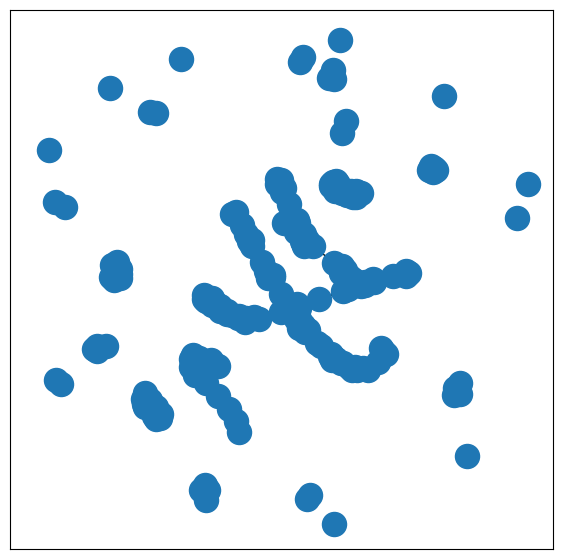

In [3]:
x = list(zip(range(len(list_y)), list_y))

x = sorted(x, key=lambda x: x[1])
combinations = [[],[]]
print(x)

for i in range(len(x)):
    for j in range(i+1, len(x)):
        if(x[j][1] <= x[i][1] + 30):
            combinations[0].append(x[i][0])
            combinations[0].append(x[j][0])
            combinations[1].append(x[j][0])
            combinations[1].append(x[i][0])
        else:
            break
                    
edge_index = torch.tensor(combinations, dtype=torch.long)
x = torch.tensor(list_list_featurevectors, dtype=torch.float)

data = Data(x=x, edge_index=edge_index)

def visualize_graph(G, color):
    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])
    nx.draw_networkx(G, pos=nx.spring_layout(G, seed=42), with_labels=False,
                    node_color=color, cmap="Set2")
    plt.show()



G = to_networkx(data, to_undirected=True)
visualize_graph(G, color=data.y)

In [4]:
print(f"Num nodes: {data.num_nodes}")
print(f"Num edge: {data.num_edges}")
print(f"Num feature: {data.num_node_features}")
print(f"Num isolated noded: {data.has_isolated_nodes()}")
print(f"Num self loops: {data.has_self_loops()}")
print(f"Num directed: {data.is_directed()}")

Num nodes: 226
Num edge: 1364
Num feature: 60660
Num isolated noded: True
Num self loops: False
Num directed: False


In [5]:
# Class division in 150.
import math

class_number = 50

print(max(list_y))

interval = math.ceil(max(list_y) / class_number)

# 31 / 30 = 1
# [z *  interval, (z + 1) * interval]

new_list_y = [math.floor(y / interval) for y in list_y]

data.num_classes = class_number
data.y = torch.tensor(new_list_y, dtype=torch.float32).reshape((226, 1))

print(max(new_list_y))

4624
49


In [6]:
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = GCNConv(data.num_node_features, 30000)
        self.conv2 = GCNConv(30000, 10000)
        self.linear1 = torch.nn.Linear(10000,1)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        x = self.linear1(x)

        return x

In [7]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GCN().to(device)
data = data.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

model.train()
for epoch in range(1):
    optimizer.zero_grad()
    out = model(data)
    loss = F.mse_loss(out, data.y)
    loss.backward()
    optimizer.step()
    print(f"Epoch number {epoch}")

Epoch number 0


In [ ]:
model.eval()
pred = model(data).argmax(dim=1)
acc_1 = int(((torch.abs(pred - data.y))).sum()) / len(list_y)
acc_2 = int((torch.pow((pred - data.y), 2)).sum()) / len(list_y)
print(f'ME: {acc_1:.4f}')
print(f'MSE: {acc_2:.4f}')

Accuracy 1: 2540.0000
Accuracy 1: 43352.0000
